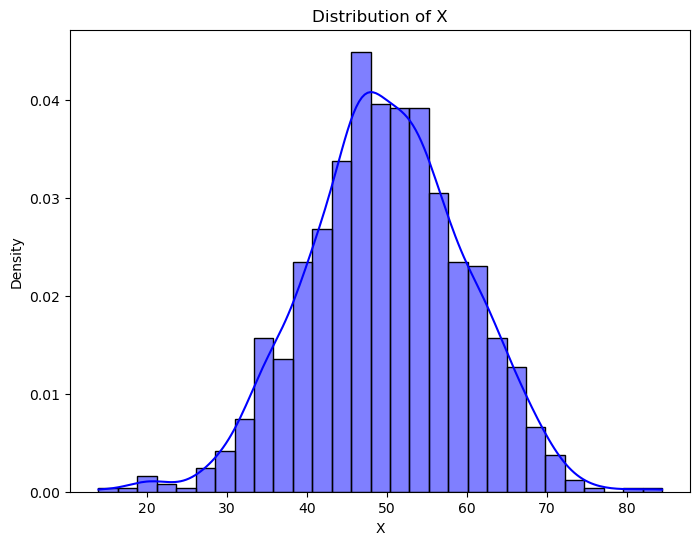


Descriptive Statistics for X:
count    1000.000000
mean       49.924794
std         9.759642
min        13.984552
25%        43.781937
50%        49.795644
75%        56.311779
max        84.403452
Name: X, dtype: float64


c:\Users\ChrisSaid\anaconda3\envs\BiQ_env_20231205\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Goodness-of-Fit Test Results for X:
Distribution    Parameters                     D-Statistic     P-Value        
norm            49.9, 9.8                      0.018           0.886          
expon           14.0, 35.9                     0.383           0.000          
gamma           890.6, -241.8, 0.3             0.022           0.730          
lognorm         0.0, -862.6, 912.5             0.018           0.891          
beta            2058759.2, 430.7, -968039.8, 968292.2 0.017           0.930          
johnsonsu       1.0, 5.9, 59.3, 55.6           0.018           0.909          


In [3]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog, ttk
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Global variables
df = None
columns = None
window = None

# Read Excel file
def read_excel_file(file_path):
    """Reads an Excel file and returns a DataFrame."""
    try:
        global df, columns
        df = pd.read_excel(file_path)  # Read Excel file into a DataFrame
        columns = df.columns.tolist()  # Get column names
        return df  # Return the DataFrame
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return None

def plot_histogram(column):
    """Plots histogram for the selected column."""
    try:
        # Plot distribution
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, color='blue', stat='density')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()
    except Exception as e:
        print(f"Error plotting histogram: {e}")

def fit_distributions(column):
    """Fits common distributions to the selected column and evaluates goodness-of-fit."""
    try:
        data = df[column].dropna()

        # Fit common distributions including Johnson transformation
        distributions = ['norm', 'expon', 'gamma', 'lognorm', 'beta', 'johnsonsu']
        results = {}

        for dist_name in distributions:
            if dist_name == 'johnsonsu':
                params = stats.johnsonsu.fit(data)
            else:
                dist = getattr(stats, dist_name)
                params = dist.fit(data)

            # Perform Kolmogorov-Smirnov test for goodness-of-fit
            D, p_value = stats.kstest(data, dist_name, args=params)

            results[dist_name] = {'params': params, 'D': D, 'p_value': p_value}

        return results
    except Exception as e:
        print(f"Error fitting distributions: {e}")
        return None


def analyze_data():
    """Callback function to analyze data."""
    # Get selected column
    selected_column = combo.get()

    # Plot histogram
    plot_histogram(selected_column)

    # Calculate descriptive statistics
    descriptive_stats = df[selected_column].describe()

    # Print descriptive statistics
    print(f"\nDescriptive Statistics for {selected_column}:")
    print(descriptive_stats)

    # Fit distributions
    results = fit_distributions(selected_column)

    # Print goodness-of-fit test results
    if results:
        print(f"\nGoodness-of-Fit Test Results for {selected_column}:")
        print("{:<15} {:<30} {:<15} {:<15}".format('Distribution', 'Parameters', 'D-Statistic', 'P-Value'))
        for dist_name, result in results.items():
            params_str = ', '.join([f"{param:.1f}" for param in result['params']])
            print("{:<15} {:<30} {:<15.3f} {:<15.3f}".format(dist_name, params_str, result['D'], result['p_value']))
    else:
        print("No results.")



def main():
    global df, window

    # Create GUI window
    window = tk.Tk()
    window.title("Distribution Fitting")

    # Open a file dialog to select Excel file
    def open_file_dialog():
        file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx"), ("All files", "*.*")])
        if file_path:
            # Read Excel file into DataFrame
            df = read_excel_file(file_path)
            if df is not None:
                show_column_selection()

    # Show file selection button
    file_button = tk.Button(window, text="Select Excel File", command=open_file_dialog)
    file_button.pack(pady=20)

    # Function to show column selection
    def show_column_selection():
        # Clear existing widgets
        for widget in window.winfo_children():
            widget.destroy()

        # Label for column selection
        label = tk.Label(window, text="Select Column:")
        label.pack(pady=10)

        # Dropdown for column selection
        global combo
        combo = ttk.Combobox(window, values=columns)
        combo.pack(pady=10)

        # Analyze button
        analyze_button = tk.Button(window, text="Analyze", command=analyze_data)
        analyze_button.pack(pady=10)

    window.mainloop()

if __name__ == "__main__":
    main()
